# Intro to Pytorch

Guided by [Sebastian Raschka](https://github.com/rasbt/machine-learning-book).

In [82]:
import torch
import numpy as np
import matplotlib.pyplot as pyp

In [2]:
np.set_printoptions(precision=3)

In [3]:
a = [1,2,3]

In [4]:
b = np.array([4,5,6], dtype=np.int32)

In [20]:
t_a = torch.tensor(a)

In [6]:
t_b = torch.from_numpy(b)

In [21]:
print(t_a)

tensor([1, 2, 3])


In [8]:
print(t_b)

tensor([4, 5, 6], dtype=torch.int32)


In [10]:
t_ones = torch.ones(2,3)
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [12]:
t_ones.shape

torch.Size([2, 3])

In [16]:
rand_tensor = torch.rand(2,3)
rand_tensor

tensor([[0.8696, 0.3338, 0.8914],
        [0.1868, 0.2204, 0.4150]])

In [24]:
t_b.dtype

torch.int32

In [25]:
t_b_new = t_b.to(torch.int64)
t_b_new.dtype

torch.int64

## Math

In [27]:
torch.manual_seed(1)

In [30]:
t1 = 2*torch.rand(5,2) - 1
t1

tensor([[-0.3724, -0.6040],
        [-0.1676, -0.4313],
        [-0.3204,  0.0479],
        [ 0.5961,  0.5435],
        [-0.9776,  0.6199]])

In [31]:
t2 = torch.normal(mean=0, std=1, size=(5,2))
t2

tensor([[ 1.0579,  0.9621],
        [ 0.3935,  1.1322],
        [-0.5404, -2.2102],
        [ 2.1130, -0.0040],
        [ 1.3800, -1.3505]])

In [33]:
torch.multiply(t1, t2)

tensor([[-0.3940, -0.5810],
        [-0.0660, -0.4884],
        [ 0.1732, -0.1058],
        [ 1.2596, -0.0022],
        [-1.3490, -0.8372]])

In [35]:
t4 = torch.mean(t1, axis=0)
t4

tensor([-0.2484,  0.0352])

In [37]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
t5

tensor([[-0.9750, -0.8303,  1.5361, -0.7845,  0.3017],
        [-0.5923, -0.5543,  1.0439, -0.3525,  0.3512],
        [-0.2929, -0.0719,  0.0673, -0.6773, -0.5069],
        [ 1.1535,  0.8500, -1.5235,  1.2575,  0.0886],
        [-0.4377,  0.3172, -0.8419, -2.0680, -2.1862]])

In [38]:
t5 = torch.matmul(t1, t2.transpose(0, 1))
t5

tensor([[-0.9750, -0.8303,  1.5361, -0.7845,  0.3017],
        [-0.5923, -0.5543,  1.0439, -0.3525,  0.3512],
        [-0.2929, -0.0719,  0.0673, -0.6773, -0.5069],
        [ 1.1535,  0.8500, -1.5235,  1.2575,  0.0886],
        [-0.4377,  0.3172, -0.8419, -2.0680, -2.1862]])

In [40]:
t5 = t1.matmul(t2.transpose(0, 1))
t5

tensor([[-0.9750, -0.8303,  1.5361, -0.7845,  0.3017],
        [-0.5923, -0.5543,  1.0439, -0.3525,  0.3512],
        [-0.2929, -0.0719,  0.0673, -0.6773, -0.5069],
        [ 1.1535,  0.8500, -1.5235,  1.2575,  0.0886],
        [-0.4377,  0.3172, -0.8419, -2.0680, -2.1862]])

In [41]:
t1

tensor([[-0.3724, -0.6040],
        [-0.1676, -0.4313],
        [-0.3204,  0.0479],
        [ 0.5961,  0.5435],
        [-0.9776,  0.6199]])

In [43]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
norm_t1

tensor([0.7095, 0.4628, 0.3240, 0.8067, 1.1575])

## Using MPS (Metal Performance Shaders) for GPU on mac

In [46]:
t1.device

device(type='cpu')

In [48]:
mps_device = torch.device("mps")

In [49]:
t1_mps = t1.to(mps_device)
t1_mps

tensor([[-0.3724, -0.6040],
        [-0.1676, -0.4313],
        [-0.3204,  0.0479],
        [ 0.5961,  0.5435],
        [-0.9776,  0.6199]], device='mps:0')

In [50]:
t1

tensor([[-0.3724, -0.6040],
        [-0.1676, -0.4313],
        [-0.3204,  0.0479],
        [ 0.5961,  0.5435],
        [-0.9776,  0.6199]])

In [51]:
t1_mps.device

device(type='mps', index=0)

In [52]:
t1.device

device(type='cpu')

In [53]:
t1.numpy()

array([[-0.372, -0.604],
       [-0.168, -0.431],
       [-0.32 ,  0.048],
       [ 0.596,  0.544],
       [-0.978,  0.62 ]], dtype=float32)

In [54]:
t1_mps.numpy()

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

## Loading data

In [55]:
from torch.utils.data import DataLoader

In [56]:
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t, batch_size=4, drop_last=False)

In [58]:
for i, batch in enumerate(data_loader, start=1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2., 3.])
batch 2: tensor([4., 5.])


### Joining tensors, for examples/targets (for example ;p)

In [59]:
t_x = torch.rand([4,3], dtype=torch.float32)
t_y = torch.arange(4)

In [61]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [64]:
joint_dataset = JointDataset(t_x, t_y)

In [65]:
for ex in joint_dataset:
    print('  x: ', ex[0], '  y: ', ex[1])

  x:  tensor([0.7713, 0.3785, 0.9980])   y:  tensor(0)
  x:  tensor([0.9008, 0.4766, 0.1663])   y:  tensor(1)
  x:  tensor([0.8045, 0.6552, 0.1768])   y:  tensor(2)
  x:  tensor([0.8248, 0.8036, 0.9434])   y:  tensor(3)


In [62]:
from torch.utils.data import TensorDataset

In [66]:
joint_dataset = TensorDataset(t_x, t_y)

In [67]:
for ex in joint_dataset:
    print('  x: ', ex[0], '  y: ', ex[1])

  x:  tensor([0.7713, 0.3785, 0.9980])   y:  tensor(0)
  x:  tensor([0.9008, 0.4766, 0.1663])   y:  tensor(1)
  x:  tensor([0.8045, 0.6552, 0.1768])   y:  tensor(2)
  x:  tensor([0.8248, 0.8036, 0.9434])   y:  tensor(3)


In [68]:
TensorDataset?

In [71]:
data_loader = DataLoader(joint_dataset, batch_size=2, drop_last=False,
                         shuffle=True)
for i, batch in enumerate(data_loader, start=1):
    print(f'batch {i}:\n', batch)

batch 1:
 [tensor([[0.7713, 0.3785, 0.9980],
        [0.9008, 0.4766, 0.1663]]), tensor([0, 1])]
batch 2:
 [tensor([[0.8248, 0.8036, 0.9434],
        [0.8045, 0.6552, 0.1768]]), tensor([3, 2])]


### Epochs

In [73]:
for epoch in range(2):
    print(f'\nepoch {epoch+1} ===')
    for i, batch in enumerate(data_loader, start=1):
        print(f'batch {i}:\n', batch)


epoch 1 ===
batch 1:
 [tensor([[0.7713, 0.3785, 0.9980],
        [0.9008, 0.4766, 0.1663]]), tensor([0, 1])]
batch 2:
 [tensor([[0.8045, 0.6552, 0.1768],
        [0.8248, 0.8036, 0.9434]]), tensor([2, 3])]

epoch 2 ===
batch 1:
 [tensor([[0.8045, 0.6552, 0.1768],
        [0.9008, 0.4766, 0.1663]]), tensor([2, 1])]
batch 2:
 [tensor([[0.8248, 0.8036, 0.9434],
        [0.7713, 0.3785, 0.9980]]), tensor([3, 0])]


## Torchvision

In [74]:
import torchvision

In [75]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path,
                                            split='train',
                                            target_type='attr',
                                            download=True)

1443490838.0 bytes
26721026.0 bytes
3424458.0 bytes
6082035.0 bytes
12156055.0 bytes
2836386.0 bytes


In [79]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

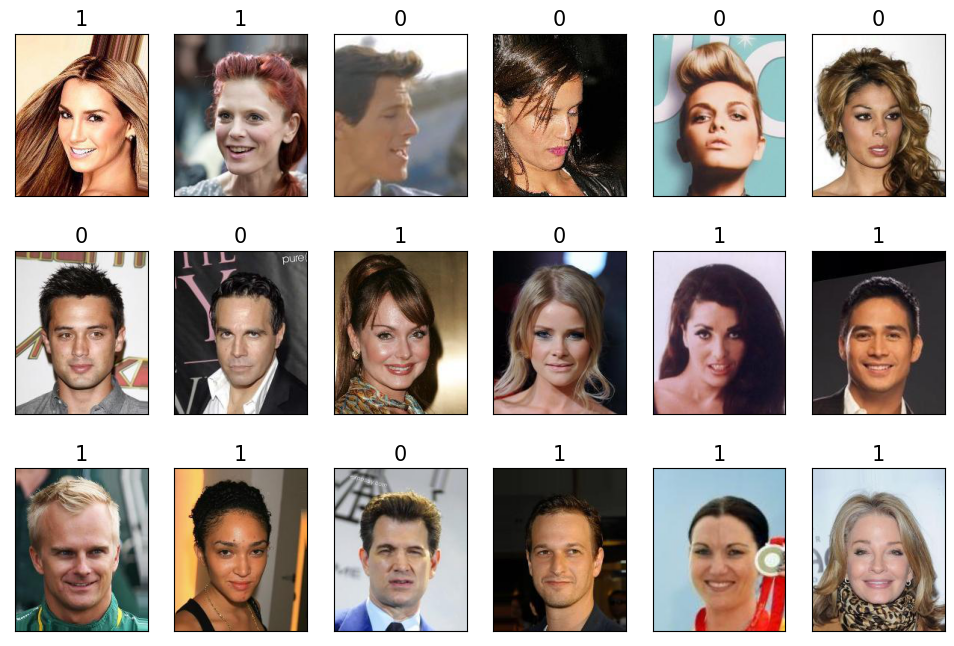

In [84]:
from itertools import islice
fig = pyp.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
    
#pyp.savefig('figures/12_05.pdf')
pyp.show()